In [1]:
import tensorflow as tf
from dataset.mnist import load_mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)

In [3]:
exMNIST = x_train[1,]

exMNIST.reshape(28,28)
npEX = np.array(exMNIST)
npEX

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [109]:
def batches(batch_size, features):
    output = []
    samplesize = len(features)
    for i in range(0, samplesize, batch_size):
        end_i = i +batch_size
        batch = features[i:end_i]
        output.append(batch)    
    return output


def Labels_Table(labels, outputsize):
    length_labels = len(labels)
    output = np.zeros((length_labels,outputsize))
    for i in range(0,length_labels, 1):
        output[i,labels[i]] = 1
        
    return (output)

In [110]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)


# Preprocess
# Batch
t_train_table = Labels_Table(t_train,10)
x_train_batch = batches(100, x_train)
t_train_batch = batches(100, t_train_table)



t_test_table = Labels_Table(t_test,10)
x_test_batch = batches(100, x_test)
t_test_batch = batches(100, t_test_table)


iteration = 1000


In [ ]:

# Build the Graph
W= tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
x = tf.placeholder("float",[None,784])

y = tf.nn.softmax(tf.matmul(x,W)+b)


y_ = tf.placeholder("float", [None,10])

cross_entrophy = -tf.reduce_sum(y_*tf.log(y))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entrophy)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


Accuracy_ANN = {'Accuracy':[]}
for i in range(iteration):
    Rand_batch=random.randrange(0,len(t_train_batch))
    sess.run(train_step, feed_dict= {x:x_train_batch[Rand_batch], y_:t_train_batch[Rand_batch]})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    sys.stdout.write("\rProgress: {:2.1f}%".format(100 * i/float(iteration)))
    if i%100 == 0:
        Accuracy = sess.run(accuracy,feed_dict={x:x_test, y_:t_test_table})
        Accuracy_ANN['Accuracy'].append(Accuracy*100)


In [41]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [18]:
print(sess.run(y, feed_dict={x: x_train_batch[1]}))

[[  3.52348463e-04   2.17038760e-04   3.44042922e-03   9.41125036e-04
    6.76595559e-03   9.46202993e-01   3.46507737e-03   9.25191944e-06
    1.76871791e-02   2.09184997e-02]
 [  1.82507720e-05   1.45496226e-10   1.66101854e-12   1.22354495e-05
    6.75616495e-04   2.98566119e-05   2.72890399e-09   9.96846735e-01
    1.16599813e-05   2.40560644e-03]
 [  1.79717389e-07   9.91570115e-01   6.02051732e-04   3.19464714e-03
    1.64168273e-06   6.81158563e-04   1.27411084e-04   1.51093082e-05
    3.26208747e-03   5.45481045e-04]
 [  2.47084026e-05   3.77216880e-09   1.75457444e-07   8.21750382e-06
    1.20267187e-05   4.93764092e-05   1.34322631e-09   9.74847913e-01
    3.86618522e-05   2.50188950e-02]
 [  1.41025680e-07   9.68550026e-01   4.01469035e-04   8.83698370e-03
    1.43150872e-04   1.43634966e-02   7.79308961e-04   2.47883618e-05
    6.41708495e-03   4.83579905e-04]
 [  1.10712381e-06   9.73398030e-01   6.24305150e-03   6.75439136e-04
    1.28286979e-06   1.38619260e-04   8.34794

In [138]:
x = tf.placeholder("float",shape=[None,784])
y_ = tf.placeholder("float",shape=[None,10])
x_image = tf.reshape(x, [-1,28,28,1])


In [140]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def conv2d(x,W):
    return tf.nn.conv2d(x,W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1)+b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2)+b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2,[-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1)+b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop,W_fc2)+b_fc2)



In [142]:

cross_entrophy = -tf.reduce_sum(y_*tf.log(y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entrophy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()


iteration = 1000

Accuracy_CNN = {'Accuracy':[]}

for i in range(iteration):
    Rand_batch=random.randrange(0,len(t_train_batch))
    sess.run(train_step, feed_dict= {x:x_train_batch[Rand_batch], y_:t_train_batch[Rand_batch], keep_prob: 1.0})
    
    
    sys.stdout.write("\rProgress: {:2.1f}%".format(100 * i/float(iteration)))
    if i % 100 == 0:
        Accuracy = sess.run(accuracy,feed_dict={x:x_test, y_:t_test_table, keep_prob: 1.0})
        Accuracy_CNN['Accuracy'].append(Accuracy*100)
        save_path=saver.save(sess, '/tmp/model.ckpt')



Progress: 99.9%

In [28]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot =True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


999

In [34]:
a, b = mnist.train.next_batch(2)

In [36]:
a.shape

(2, 784)

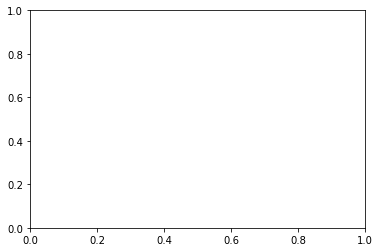

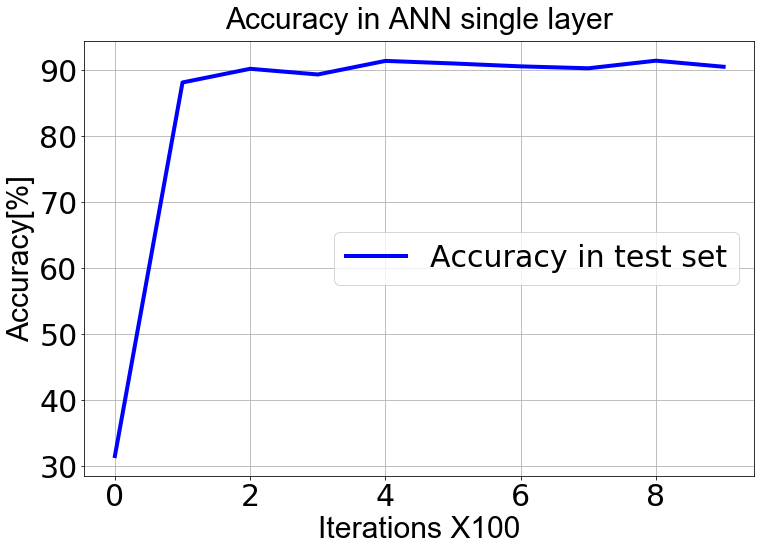

C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [117]:

title_font = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'normal','verticalalignment':'bottom'}
label_font = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'normal'}
plt.figure(figsize=(12,8))
plt.plot(Accuracy_ANN['Accuracy'], 'b',lw=4, label='Accuracy in test set')
plt.xlabel('Iterations X100',**label_font)
plt.ylabel('Accuracy[%]',**label_font)
plt.title('Accuracy in ANN single layer',**title_font)
plt.legend(loc=5,prop={'size':30})
plt.grid()
plt.tick_params(axis='x',labelsize=30)
plt.tick_params(axis='y',labelsize=30)
plt.show()
plt.legend()
_ = plt.ylim()


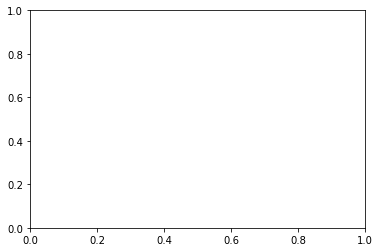

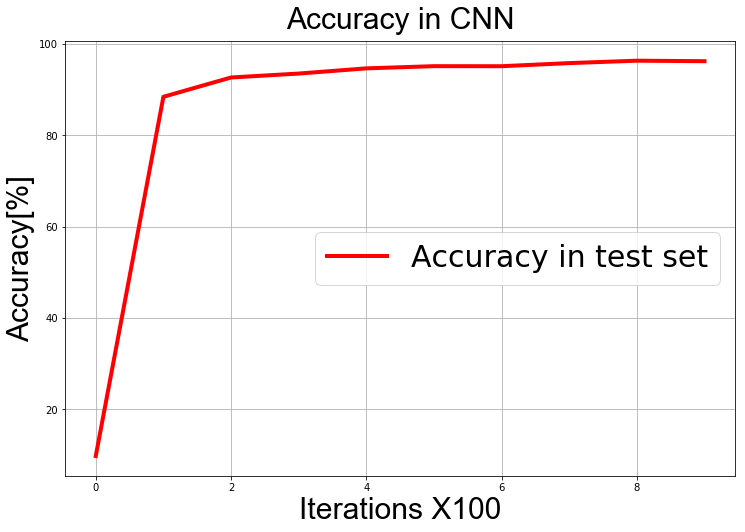

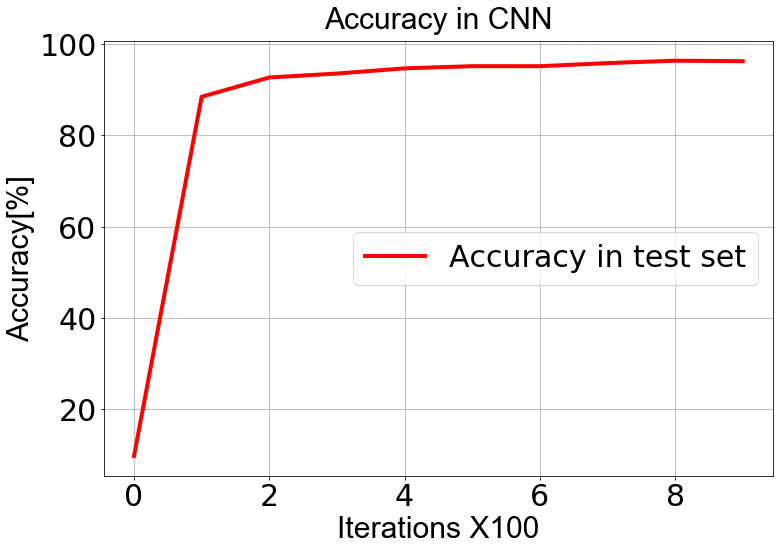

C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [108]:


title_font = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'normal','verticalalignment':'bottom'}
label_font = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'normal'}
plt.figure(figsize=(12,8))
plt.plot(Accuracy_CNN['Accuracy'], 'r',lw=4, label='Accuracy in test set')
plt.xlabel('Iterations X100',**label_font)
plt.ylabel('Accuracy[%]',**label_font)
plt.title('Accuracy in CNN',**title_font)
plt.legend(loc=5,prop={'size':30})
plt.grid()
plt.tick_params(axis='x',labelsize=30)
plt.tick_params(axis='y',labelsize=30)
plt.show()
plt.legend()
_ = plt.ylim()


In [89]:
Accuracy_CNN['Accuracy']

[0.112,
 0.88340002,
 0.92379999,
 0.94590002,
 0.94870001,
 0.95749998,
 0.95770001,
 0.9569,
 0.96600002,
 0.97049999]

In [116]:
Accuracy_ANN.get('Accuracy')

[31.520000100135803,
 88.15000057220459,
 90.219998359680176,
 89.35999870300293,
 91.420000791549683,
 91.030001640319824,
 90.590000152587891,
 90.299999713897705,
 91.449999809265137,
 90.530002117156982]

In [118]:
x = tf.placeholder(tf.float32, [None, 784]) 
W = tf.Variable(tf.zeros([784, 10])) 
b = tf.Variable(tf.zeros([10])) 
y = tf.nn.softmax(tf.matmul(x, W) + b) 


In [131]:
sess.run(tf.global_variables_initializer())
print(sess.run(y,feed_dict={x:x_train_batch[1]}))

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1

In [17]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)

exMNIST = x_train[1,]

exMNIST.reshape(28,28)
npEX = np.array(exMNIST)
npEX

# Preprocess
# Batch
t_train_table = Labels_Table(t_train,10)
x_train_batch = batches(100, x_train)
t_train_batch = batches(100, t_train_table)



t_test_table = Labels_Table(t_test,10)
x_test_batch = batches(100, x_test)
t_test_batch = batches(100, t_test_table)


iteration = 1000

def batches(batch_size, features):
    output = []
    samplesize = len(features)
    for i in range(0, samplesize, batch_size):
        end_i = i +batch_size
        batch = features[i:end_i]
        output.append(batch)    
    return output


def Labels_Table(labels, outputsize):
    length_labels = len(labels)
    output = np.zeros((length_labels,outputsize))
    for i in range(0,length_labels, 1):
        output[i,labels[i]] = 1
        
    return (output)
tf.reset_default_graph()
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def conv2d(x,W):
    return tf.nn.conv2d(x,W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
x = tf.placeholder("float",shape=[None,784])
y_ = tf.placeholder("float",shape=[None,10])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1)+b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2)+b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2,[-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1)+b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop,W_fc2)+b_fc2)


cross_entrophy = -tf.reduce_sum(y_*tf.log(y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entrophy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()


iteration = 1000

Accuracy_CNN = {'Accuracy':[]}

sess = tf.Session()
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '/tmp/model.ckpt')

    # Show the values of weights and bias
    print('Weight:')
    print(sess.run(W_fc1))
    print('Bias:')
    print(sess.run(b_fc1))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


NotFoundError: Key Variable/Adam not found in checkpoint
	 [[Node: save_1/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_1/Const_0, save_1/RestoreV2_1/tensor_names, save_1/RestoreV2_1/shape_and_slices)]]

Caused by op 'save_1/RestoreV2_1', defined at:
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-1471552e22ba>", line 103, in <module>
    saver = tf.train.Saver()
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 1056, in __init__
    self.build()
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 1086, in build
    restore_sequentially=self._restore_sequentially)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 691, in build
    restore_sequentially, reshape)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 669, in restore_v2
    dtypes=dtypes, name=name)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Kyuhwan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key Variable/Adam not found in checkpoint
	 [[Node: save_1/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_1/Const_0, save_1/RestoreV2_1/tensor_names, save_1/RestoreV2_1/shape_and_slices)]]
